# Imports

In [1]:
from model_builder import ModelBuilder
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("config.json", "rb") as json_file:
    config = json.load(json_file)
config

{'becker': {'filename': 'beckerestimation_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'mean_pre_discussion_error',
   'mean_post_discussion_error',
   'mean_pre_discussion_error_pct',
   'mean_post_discussion_error_pct',
   'question',
   'chatrooms',
   'trial_indx']},
 'csop': {'filename': 'csop_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'round_num',
   'round_index',
   'task_index',
   'complexity',
   'type',
   'social_perceptiveness',
   'skill',
   'normalized_score',
   'zscore_score',
   'zscore_round_duration',
   'zscore_efficiency']},
 'csopII': {'filename': 'csopII_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'vis_img',
   'int_verb',
   'ort_img',
   'rep_man',
   'soc_pers',
   'team_size',
   'difficulty',
   'score',
   'duration',
   'efficiency',
   'timestamp']},
 'dat': {'filename': 'DAT_output_conversation_level.csv',
  'cols_to_ignore':

# Train Model on CSOP I and Test on CSOP II

In [3]:
csop_model = ModelBuilder(dataset_names = ["csop"], test_dataset_names=["csopII"])

In [4]:
csop_model.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
0,2.560154,2.619974,0.644436,1.453867,-0.317278,1.048590,0.960511,2.071564,-0.305677,1.537633,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1,1.944036,1.829637,0.153917,0.464223,-0.317278,0.283103,0.149389,0.424246,-0.273195,0.272771,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
2,-0.225970,-0.101179,0.235670,-0.275075,0.694970,0.027940,0.242517,-0.216703,0.668787,0.048901,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
3,0.724344,0.600746,1.543721,1.022072,1.273397,1.201687,1.399118,0.880518,1.188502,1.033927,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
4,0.630254,0.802774,2.143244,1.287185,1.996432,1.660980,2.126124,1.473972,1.870627,1.839856,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,-0.592923,-0.609800,-0.500108,-0.431856,-0.461885,-0.482385,-0.505518,-0.437966,-0.468088,-0.488385,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
975,-0.592923,-0.609800,-0.500108,-0.431856,-0.461885,-0.482385,-0.505518,-0.437966,-0.468088,-0.488385,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
976,-0.592923,-0.609800,-0.500108,-0.431856,-0.461885,-0.482385,-0.505518,-0.437966,-0.468088,-0.488385,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
977,-0.592923,-0.609800,-0.500108,-0.431856,-0.461885,-0.482385,-0.505518,-0.437966,-0.468088,-0.488385,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0


In [5]:
csop_model.select_target(target = "zscore_efficiency")

In [6]:
csop_model.select_test_target(target = "efficiency")

Checking Holdout Sets...Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3913	MAE: 0.5235	MSE: 0.5873	RMSE: 0.7664
Validation Set:	R2: 0.2148	MAE: 0.7375	MSE: 1.0241	RMSE: 1.012
Test Set:	R2: 0.1084	MAE: 0.7244	MSE: 0.8907	RMSE: 0.9438


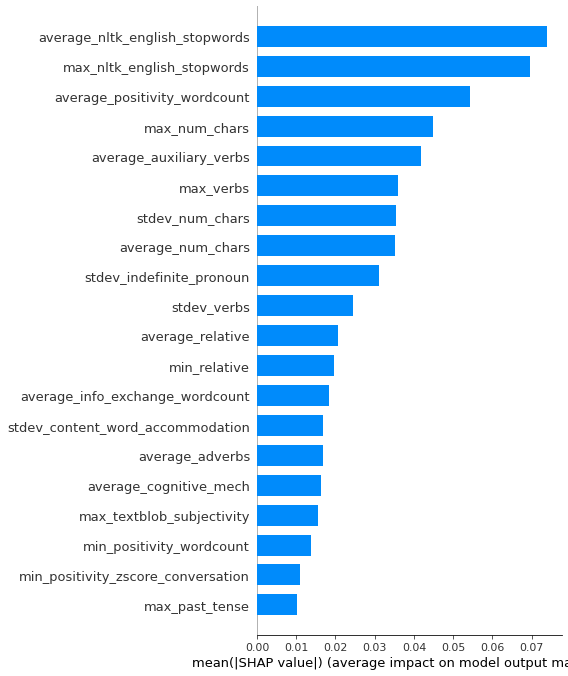

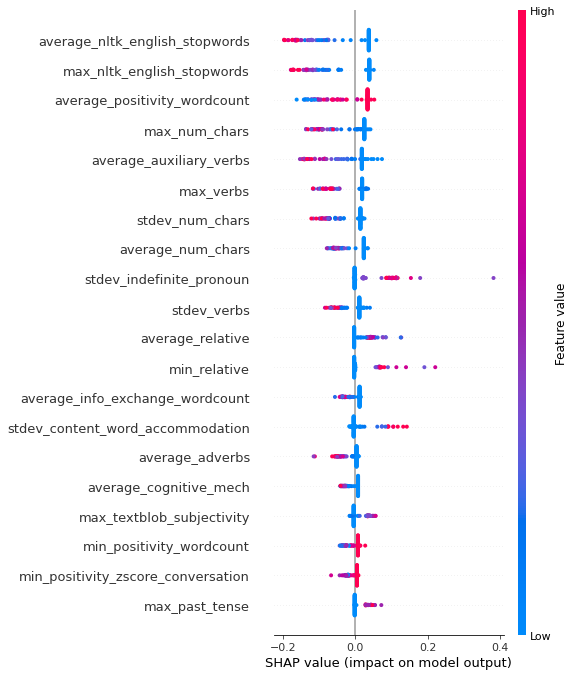

In [7]:
csop_model.define_model(model_type = 'rf')
csop_model.evaluate_model(csop_model.baseline_model)

# Train Model on a Blended CSOP Model

In [8]:
csop_blended_model = ModelBuilder(dataset_names = ["csop", "csopII"])

In [9]:
csop_blended_model.select_target(target=["zscore_efficiency", "efficiency"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3769	MAE: 0.5258	MSE: 0.61	RMSE: 0.781
Validation Set:	R2: 0.154	MAE: 0.7082	MSE: 0.888	RMSE: 0.9423
Test Set:	R2: 0.1818	MAE: 0.7078	MSE: 0.9099	RMSE: 0.9539


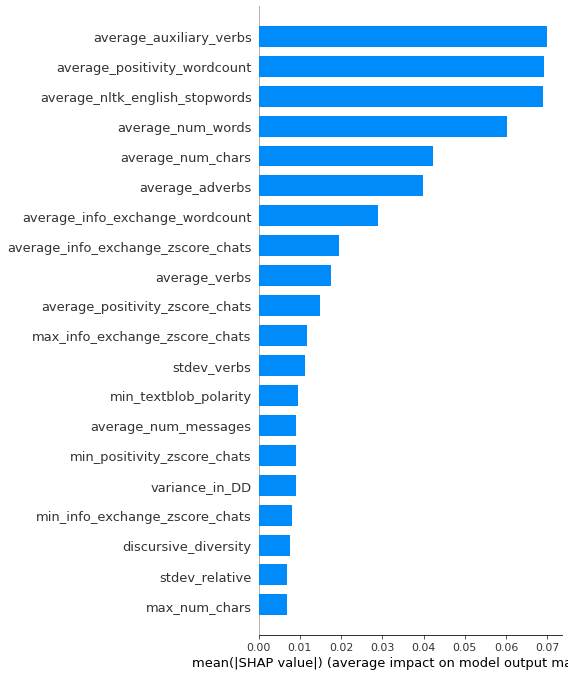

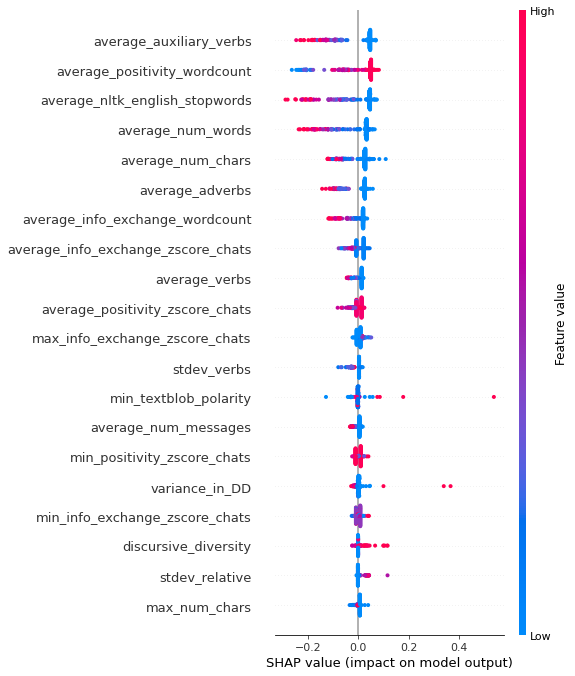

In [10]:
csop_blended_model.define_model(model_type = 'rf')
csop_blended_model.evaluate_model(csop_blended_model.baseline_model)

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.378	MAE: 0.5237	MSE: 0.6089	RMSE: 0.7803
Validation Set:	R2: 0.1811	MAE: 0.6998	MSE: 0.8596	RMSE: 0.9271
Test Set:	R2: 0.1945	MAE: 0.694	MSE: 0.8957	RMSE: 0.9464


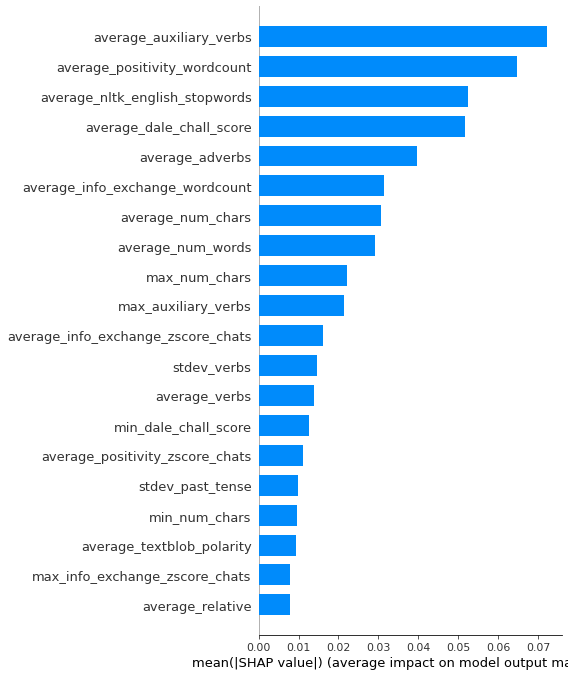

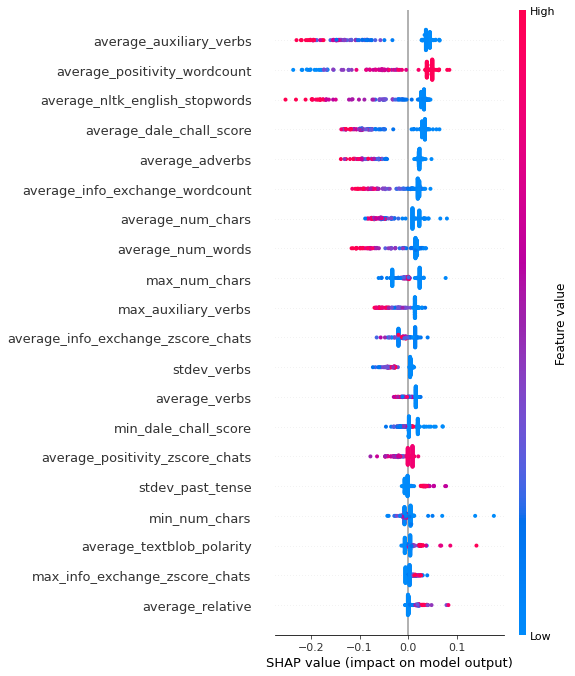

In [11]:
# What happens when we standardize within all datasets?
csop_blended_model_within = ModelBuilder(dataset_names = ["csop", "csopII"], standardize_within=True)
csop_blended_model_within.select_target(target=["zscore_efficiency", "efficiency"])
csop_blended_model_within.define_model(model_type = 'rf')
csop_blended_model_within.evaluate_model(csop_blended_model_within.baseline_model)

# Juries Model

In [15]:
juries_model = ModelBuilder(dataset_names = ["juries"])

In [16]:
juries_model.select_target(target=["majority_pct"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.8649	MAE: 0.3223	MSE: 0.1393	RMSE: 0.3732
Validation Set:	R2: -0.0951	MAE: 0.772	MSE: 0.8392	RMSE: 0.9161
Test Set:	R2: 0.1485	MAE: 0.7185	MSE: 0.7336	RMSE: 0.8565


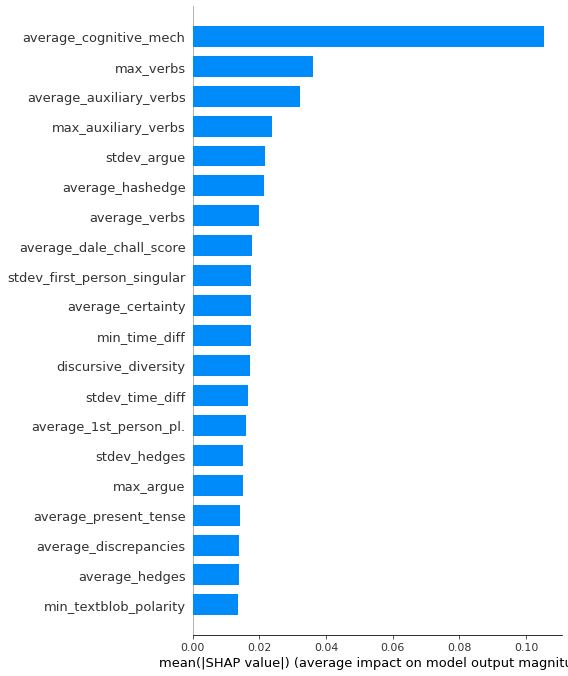

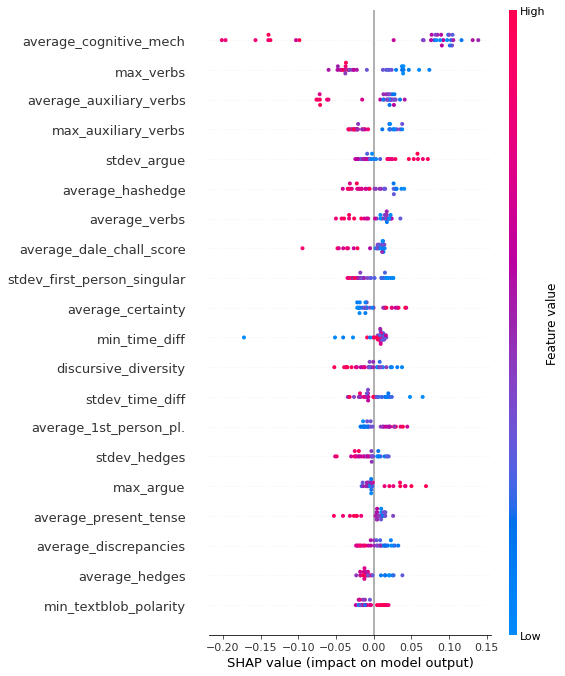

In [17]:
juries_model.define_model(model_type = 'xgb')
juries_model.evaluate_model(csop_blended_model.baseline_model)

# Multi-Task Joint Model

In [18]:
joint_model = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"])

In [19]:
joint_model.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])

In [20]:
# has combined targets
joint_model.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive,target_raw,target_std
0,0.142519,0.143817,3.009768,1.934112,1.429007,2.118215,2.953652,1.854109,1.863091,2.148553,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
1,-0.059825,-0.095861,3.105763,1.524462,4.457525,2.683934,3.217933,1.618191,5.106987,2.821295,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.600000,-1.370166
2,0.534553,0.461156,1.635189,1.441009,0.638959,1.611019,1.696440,1.471554,1.097531,1.747931,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.666667,-0.979051
3,0.753556,0.620943,2.318607,2.601732,1.099820,2.488858,2.359473,2.487333,1.071580,2.390438,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.750000,-0.490158
4,-0.131305,-0.201890,3.863556,1.508086,6.235134,2.957040,3.880149,1.447871,6.534301,2.938458,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,-0.813038,-0.817707,-0.581561,-0.598391,-0.480276,-0.593335,-0.568357,-0.586710,-0.472514,-0.580210,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,76.599130,-0.959289
2580,1.184415,1.333912,-0.118528,0.115402,-0.151090,-0.066631,-0.185548,0.058722,-0.238954,-0.126676,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,82.905364,0.131140
2581,0.289005,0.280982,-0.287931,-0.352229,-0.151090,-0.339736,-0.302151,-0.364180,-0.213002,-0.364781,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,83.106215,0.165870
2582,0.268916,0.211295,-0.005593,-0.153919,0.178097,-0.027616,-0.024669,-0.188613,0.150314,-0.096440,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,90.162293,1.385957


In [21]:
# standardize_within defaults to false, so let's check what happens when we change it to true
joint_model_std_within = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"], standardize_within= True)

In [22]:
joint_model_std_within.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])

In [23]:
joint_model_std_within.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive,target_raw,target_std
0,-0.966684,-0.902061,1.056610,-0.133254,-0.364195,-0.115264,0.924731,-0.263991,-0.082895,-0.116493,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
1,-1.429728,-1.466075,1.195032,-0.574666,1.829196,0.613128,1.303952,-0.516440,2.253308,0.746363,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.600000,-1.370166
2,-0.069558,-0.155293,-0.925492,-0.664589,-0.936384,-0.768305,-0.879261,-0.673352,-0.634239,-0.630330,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.666667,-0.979051
3,0.431607,0.220723,0.059976,0.586130,-0.602607,0.361959,0.072135,0.413604,-0.652928,0.193747,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.750000,-0.490158
4,-1.593301,-1.715586,2.287747,-0.592311,3.116621,0.964766,2.254175,-0.698695,3.281237,0.896636,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,-1.155059,-1.157620,-0.927146,-0.858036,-0.474490,-0.914655,-0.919769,-0.847064,-0.471059,-0.902045,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,76.599130,-0.959289
2580,0.564689,0.672912,0.218480,0.328400,0.129463,0.160269,0.038561,0.223074,-0.038227,0.029376,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,82.905364,0.131140
2581,-0.206233,-0.222889,-0.200651,-0.448876,0.129463,-0.397099,-0.253345,-0.478105,0.009865,-0.459620,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,83.106215,0.165870
2582,-0.223529,-0.282177,0.497901,-0.119255,0.733415,0.239893,0.441307,-0.187011,0.683160,0.091470,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,90.162293,1.385957


## XGBoost

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.5158	MAE: 0.3835	MSE: 0.4853	RMSE: 0.6966
Validation Set:	R2: 0.0721	MAE: 0.7023	MSE: 0.9168	RMSE: 0.9575
Test Set:	R2: 0.138	MAE: 0.6939	MSE: 0.8457	RMSE: 0.9196


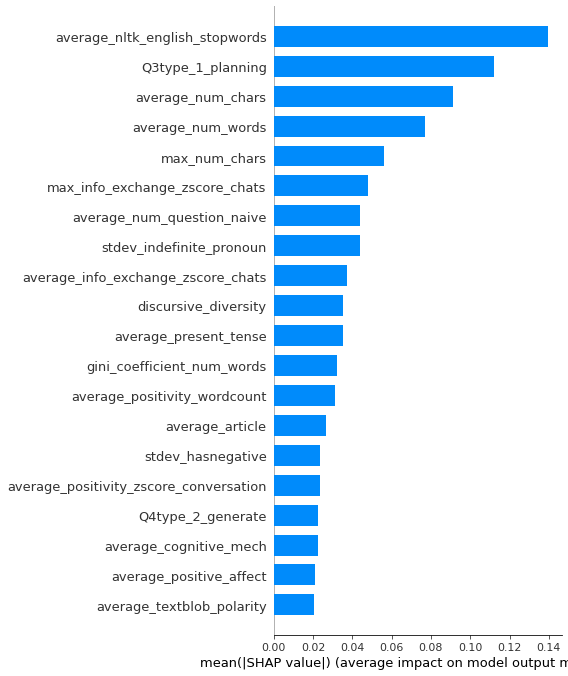

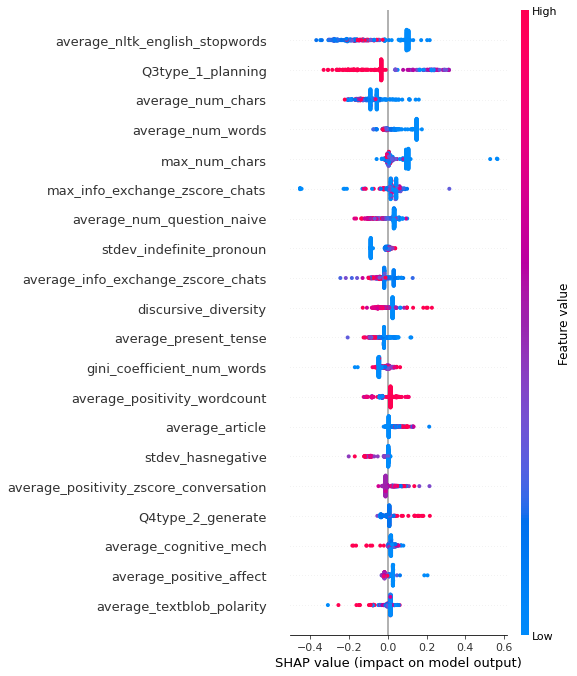

In [24]:
joint_model.define_model(model_type = 'xgb')
joint_model.evaluate_model(joint_model.baseline_model)

## Lasso

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.163	MAE: 0.6914	MSE: 0.8389	RMSE: 0.9159
Validation Set:	R2: 0.0989	MAE: 0.7179	MSE: 0.8903	RMSE: 0.9436
Test Set:	R2: 0.0891	MAE: 0.7157	MSE: 0.8936	RMSE: 0.9453


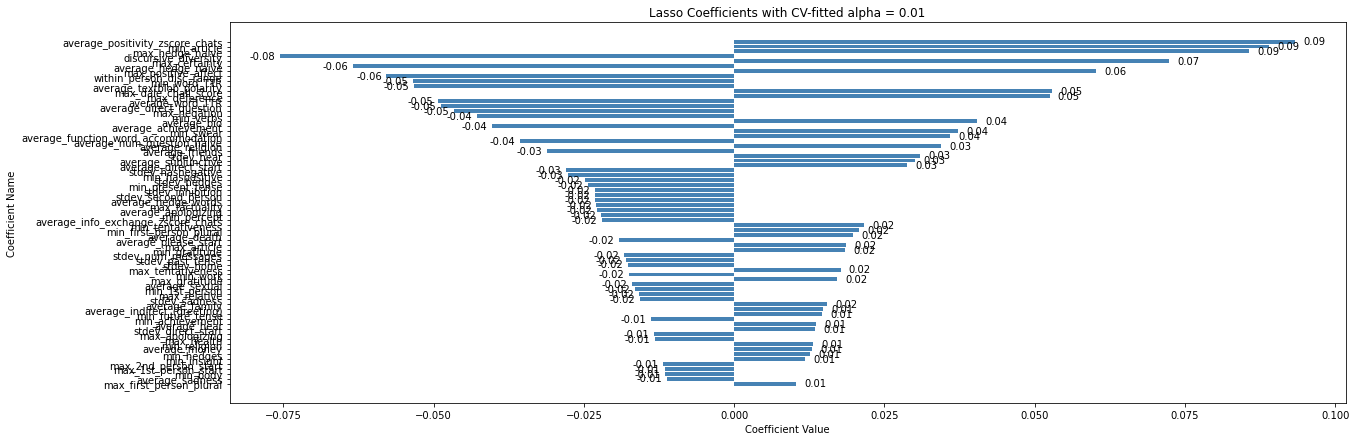

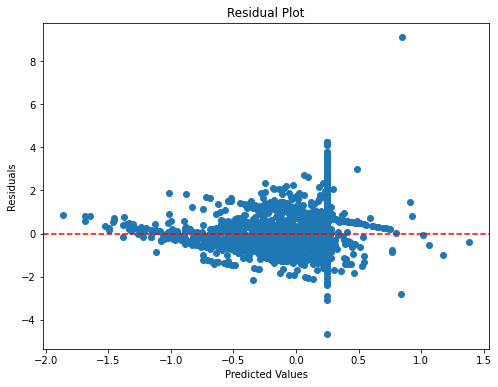

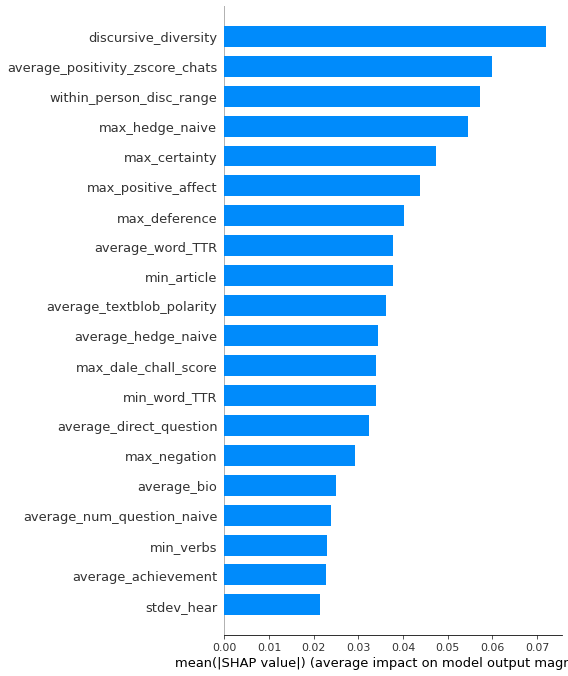

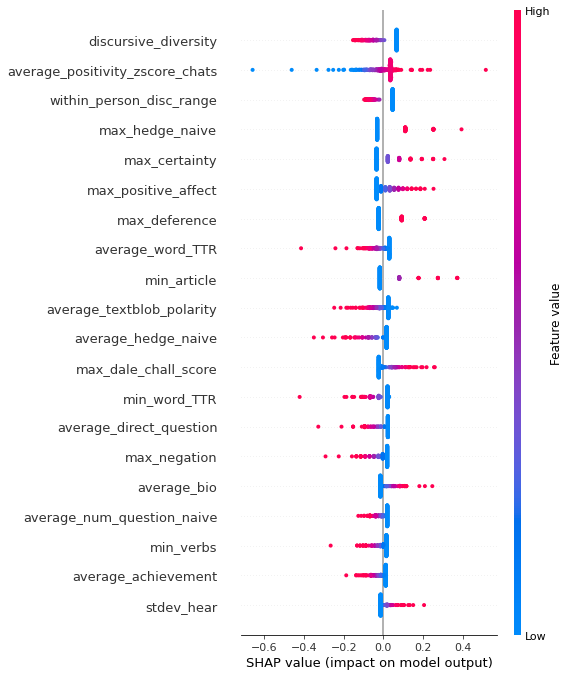

In [25]:
joint_model.define_model(model_type = 'lasso')
joint_model.evaluate_model(joint_model.baseline_model)

## Linear Regression

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.2718	MAE: 0.6364	MSE: 0.7298	RMSE: 0.8543
Validation Set:	R2: -0.0346	MAE: 0.756	MSE: 1.0222	RMSE: 1.011
Test Set:	R2: -0.1756	MAE: 0.8101	MSE: 1.1533	RMSE: 1.0739


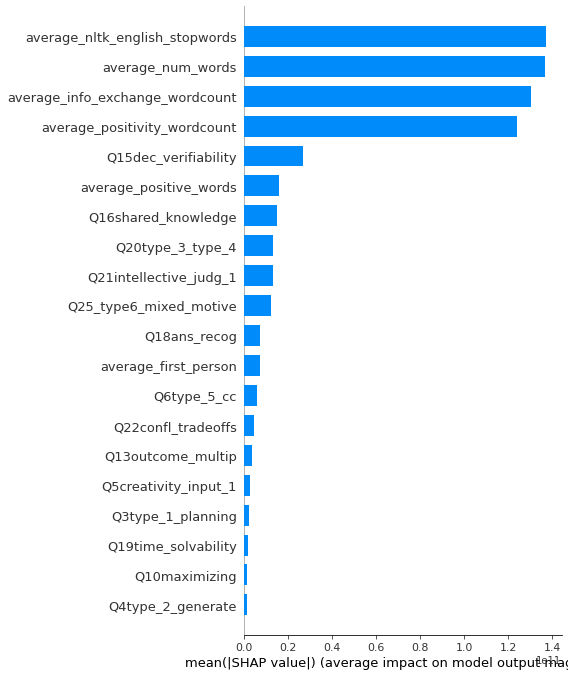

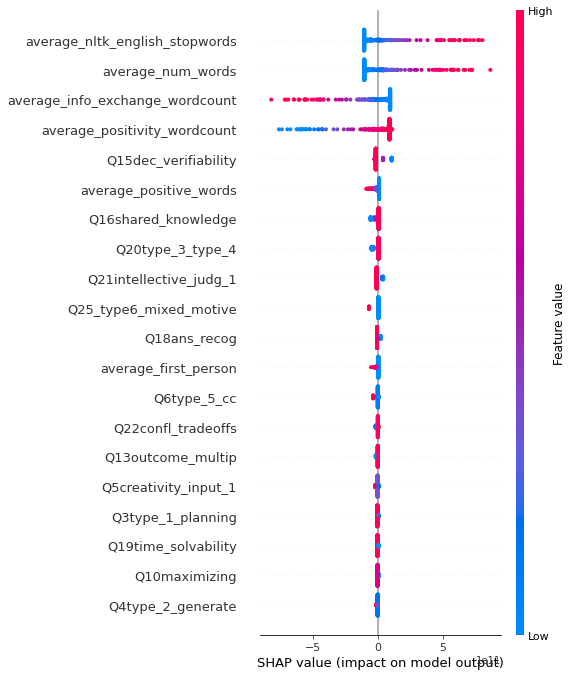

In [26]:
joint_model.define_model(model_type = 'linear')
joint_model.evaluate_model(joint_model.baseline_model)

## Random Forest

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.4645	MAE: 0.4858	MSE: 0.5367	RMSE: 0.7326
Validation Set:	R2: 0.1525	MAE: 0.6734	MSE: 0.8373	RMSE: 0.915
Test Set:	R2: 0.1926	MAE: 0.6622	MSE: 0.7921	RMSE: 0.89


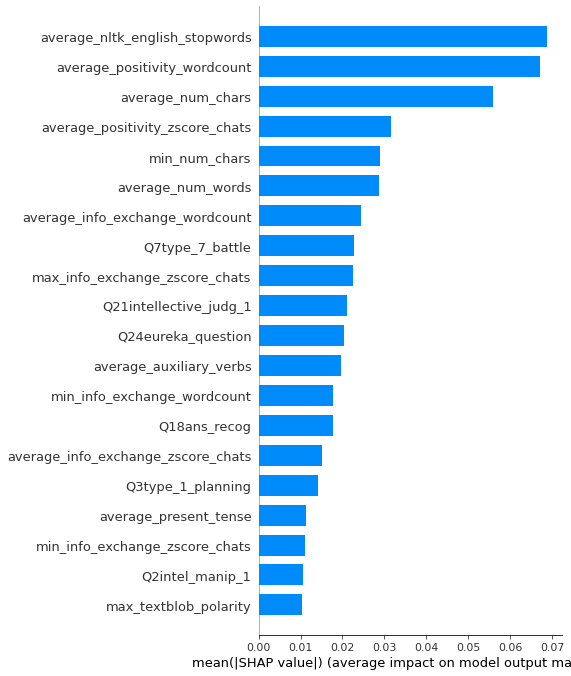

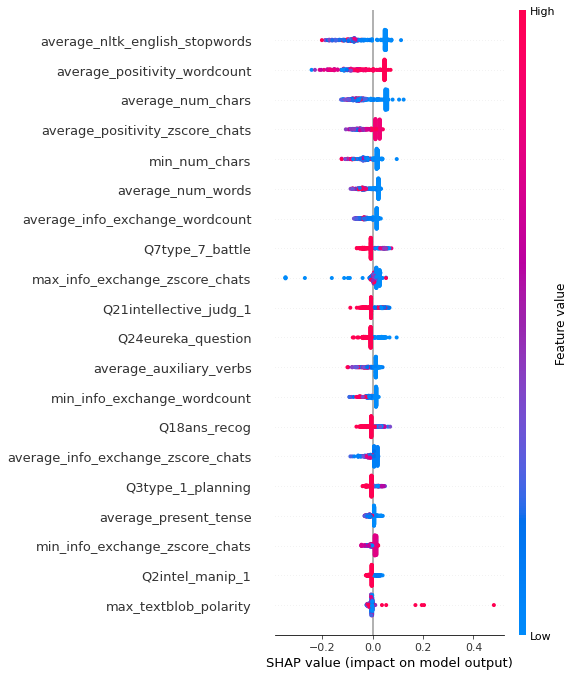

In [27]:
joint_model.define_model(model_type = 'rf')
joint_model.evaluate_model(joint_model.baseline_model)

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.467	MAE: 0.4849	MSE: 0.5342	RMSE: 0.7309
Validation Set:	R2: 0.1677	MAE: 0.6664	MSE: 0.8224	RMSE: 0.9069
Test Set:	R2: 0.1896	MAE: 0.6702	MSE: 0.7951	RMSE: 0.8917


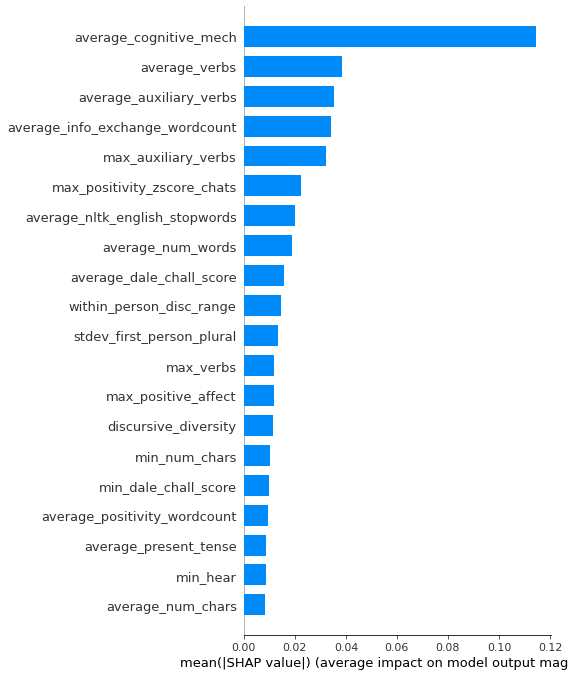

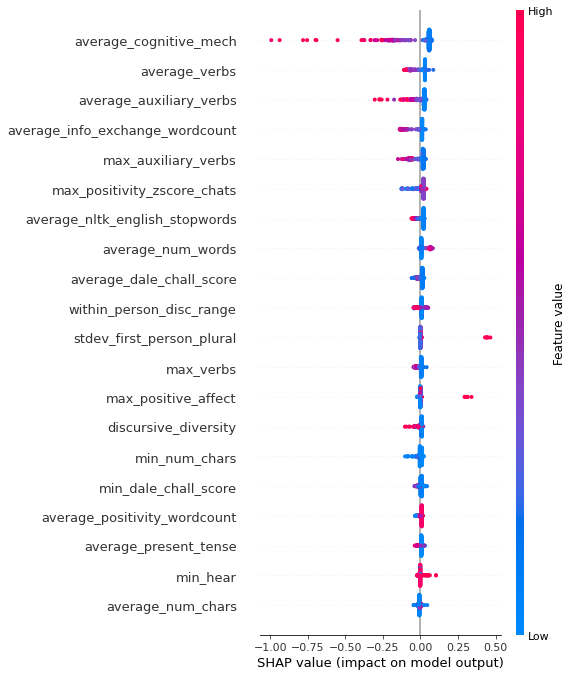

In [28]:
# compare to within-standardized version
joint_model_std_within.define_model(model_type = 'rf')
joint_model_std_within.evaluate_model(joint_model_std_within.baseline_model)